## This script includes the following points:
1. Importing libraries
2. Drop the columns that are not necessary and those are just in one data set
3. K- Nearest Neighbor
4. Plot the relationship between number of neighbors and accuracy.
5. Confusion Matrices
6. Try again with scaled Data
7. Calculate Accuracy for All Weather Stations
8. Conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Create a path to where your data is stored.
path = r"C:\Users\Poory\OneDrive\Desktop\project\ClimateWins"

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [6]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [7]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [8]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,0.8,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,7.8,-5.9,4.2,10.0,8.5
1,19600102,1,6.1,2.9,2.3,7.7,8.2,1.6,6.1,7.7,2.1,8.6,9.8,6.2,3.4,12.2,-9.5,4.0,9.5,8.9
2,19600103,1,8.5,3.1,2.7,6.8,7.1,0.7,8.4,6.5,4.6,6.9,8.6,5.8,1.9,10.2,-9.5,2.4,10.3,10.5
3,19600104,1,6.3,2.0,2.0,6.7,6.8,-0.1,9.4,5.8,3.2,7.0,10.3,3.9,3.0,10.8,-11.5,1.2,11.2,7.4
4,19600105,1,3.0,2.0,2.5,8.0,7.7,0.4,8.9,5.4,3.6,8.1,12.1,1.8,3.7,9.9,-9.3,3.3,11.4,5.7


In [10]:
#create a scaler object using StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns

df_scaled.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,-1.707663,-1.599964,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,-1.707657,-1.599964,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,-1.707652,-1.599964,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,-1.707646,-1.599964,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,-1.707641,-1.599964,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396


In [12]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Drop the columns that are not necessary and those are just in one data set:

df2 = df.drop(columns=['DATE', 'MONTH','GDANSK_temp_mean', 'ROMA_temp_mean', 'TOURS_temp_mean'])
df_scaled2 = df_scaled.drop(columns=['DATE', 'MONTH','GDANSK_temp_mean', 'ROMA_temp_mean', 'TOURS_temp_mean'])
answers2 = answers.drop(columns=['DATE'])

In [21]:
# Set X (features) and y (target labels) [NOT SCALED]
X = df2
y = answers2

In [22]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.multioutput import MultiOutputClassifier

#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) 
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

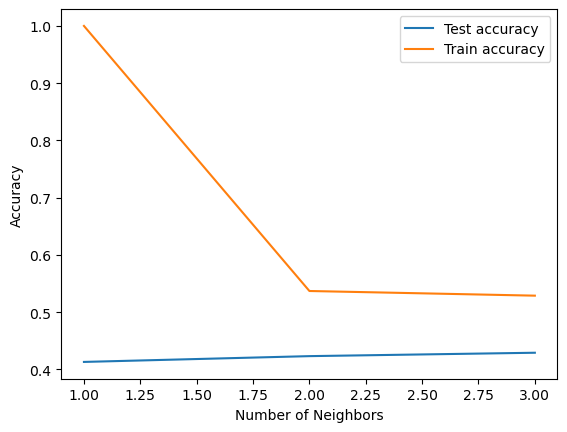

In [24]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### **Training Accuracy:** As shown in the graph, with k=1, the model fits the training data perfectly, achieving a 100% accuracy. This suggests that the model is overfitting on the training data when k=1. However, as the number of neighbors increases (k=2 or k=3), the training accuracy decreases, which is expected because the model now averages over more neighbors.

### **Testing Accuracy:** The testing accuracy stays fairly constant around 41%–42%. This indicates that increasing the number of neighbors from 1 to 3 doesn’t improve the generalization performance of the model significantly for the test set.

In [25]:
# [hatGPT Version:](OpenAI. (2024). ChatGPT (4o) [Large language model]. https://chatgpt.com/c/a42b6d18-06fa-40a8-9873-bb59f6afa0cf)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Define k values (neighbors)
k_range = np.arange(1, 4)  # Use k=1 to 4 as suggested

train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Dictionary to store scores
scores = {}

# Iterate through different values of k
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)  # Multi-label handling
   
    # Fit the model
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
   
    # Track accuracy
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)
    print(f'For k={k}: Train Accuracy={train_acc[i]}, Test Accuracy={test_acc[i]}')

For k=1: Train Accuracy=1.0, Test Accuracy=0.4132101777622865
For k=2: Train Accuracy=0.5370671624448059, Test Accuracy=0.42331822934820496
For k=3: Train Accuracy=0.5289333023471996, Test Accuracy=0.4292436388985709


<function matplotlib.pyplot.show(close=None, block=None)>

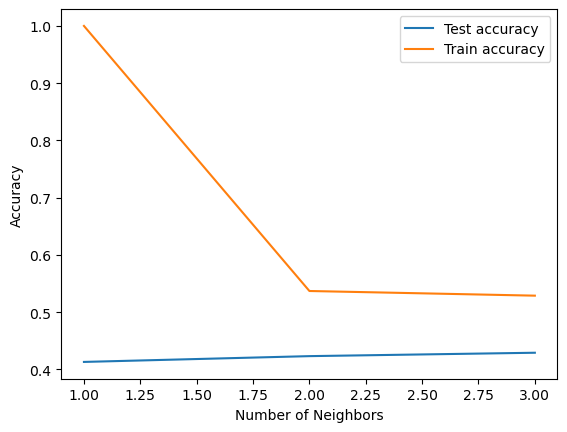

In [26]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

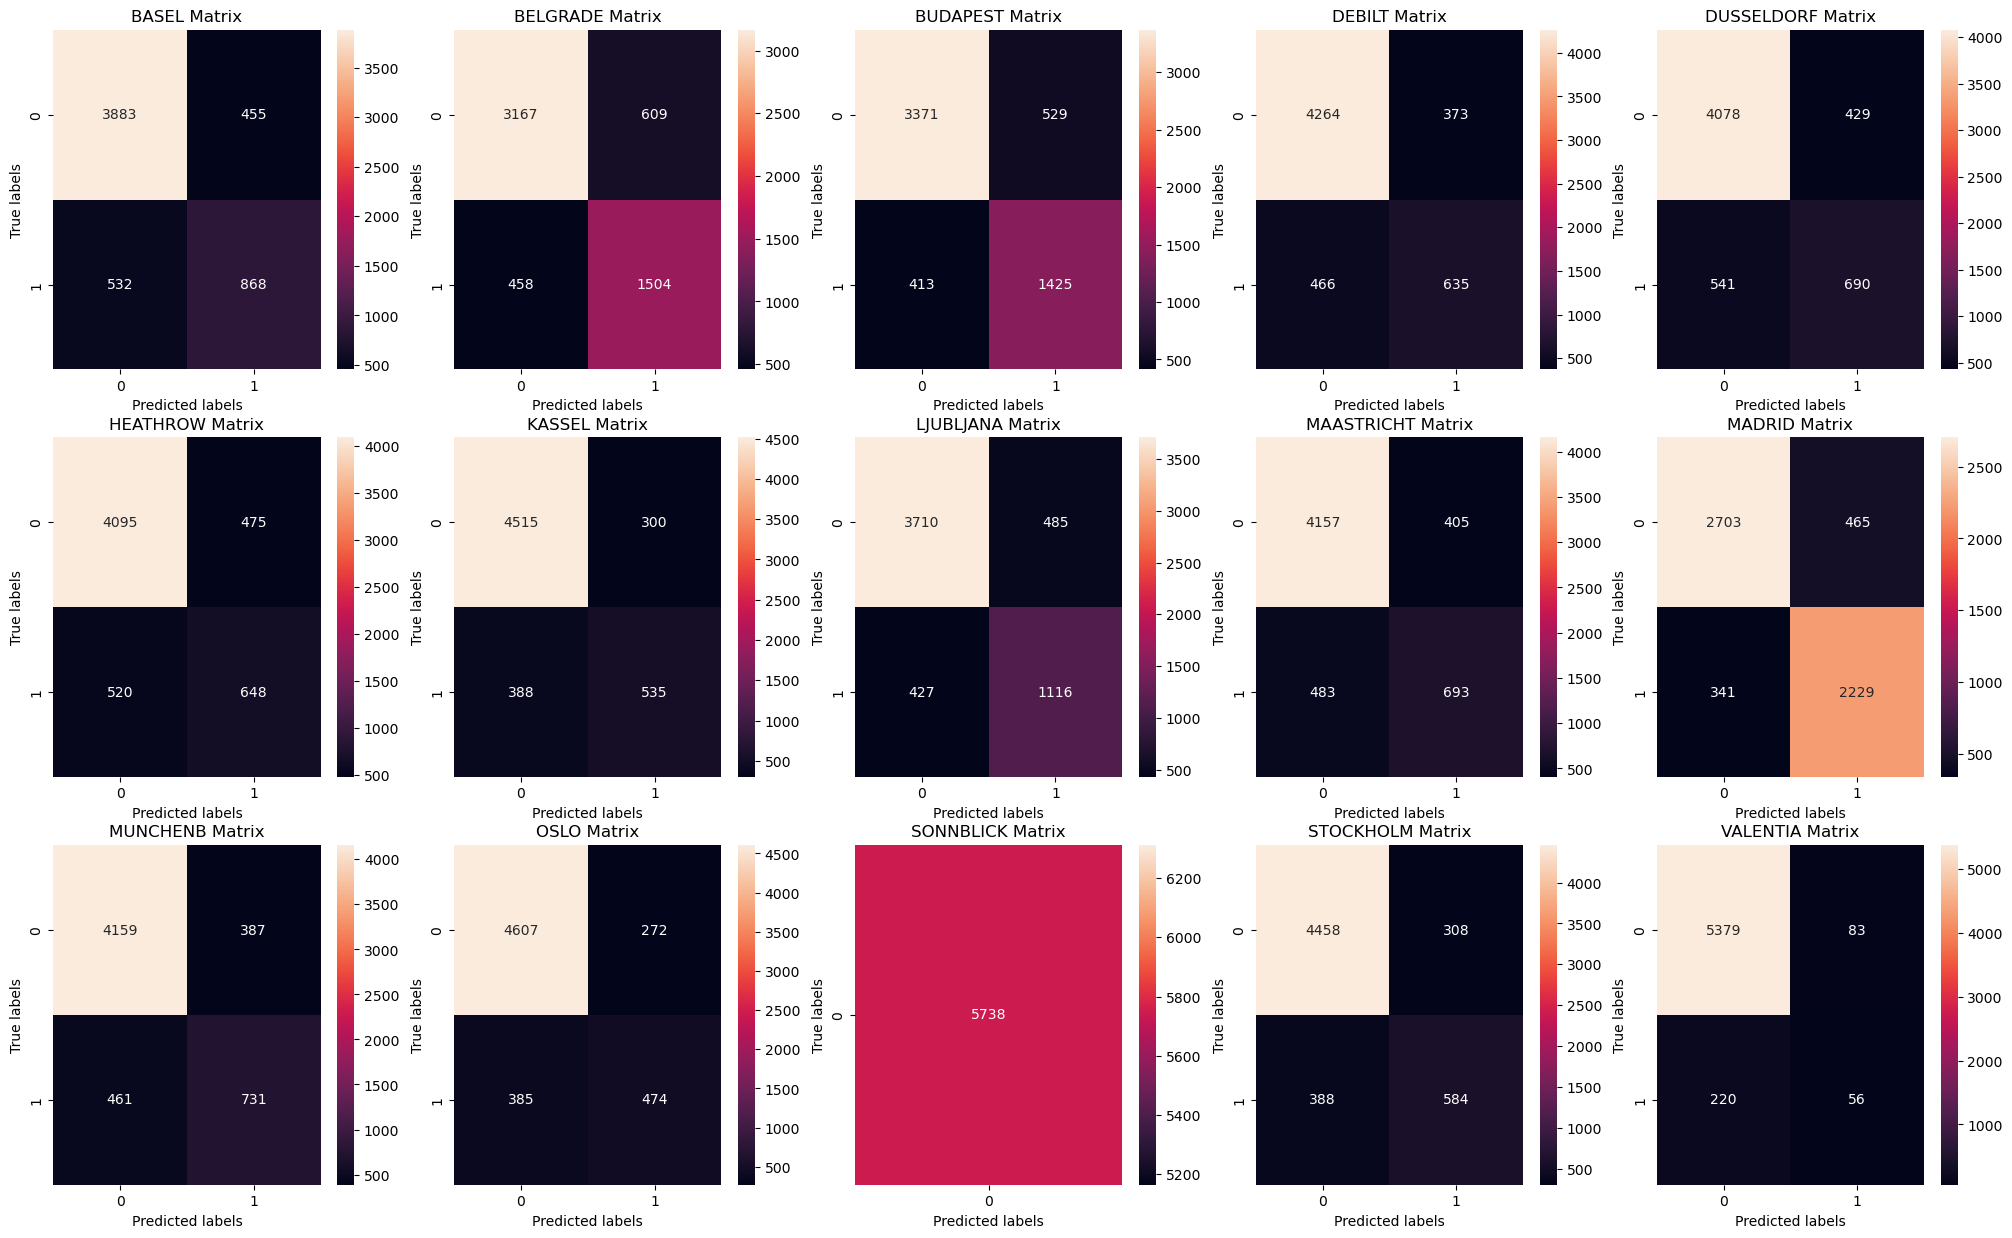

In [27]:
locations = list({x.split("_")[0] for x in df2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### **Accuracy for Different Stations:** 
#### As observed, stations such as SONNBLICK have an almost perfect accuracy of 1.0, which could suggest the model overfits or the data for that particular station is very clean and predictable. VALENTIA also has a very high accuracy, around 95%, followed by OSLO (89%), STOCKHOLM (88%), and KASSEL (88%).

### **Less Accurate Stations:** 
#### On the other hand, stations like BELGRADE and BUDAPEST have lower accuracy (81%-83%), which might suggest that these stations have more complex or noisy weather patterns, making it harder for the KNN algorithm to predict them accurately.

### **Overfitting:** 
#### Looking at the train/test accuracy (Train: 100%, Test: 41%-42%) and confusion matrices, it is clear that the model is likely overfitting for certain stations like SONNBLICK and VALENTIA, which show very high accuracies.

In [28]:
# Set X (features) and y (target labels) [NOT SCALED]
X = df_scaled2
y = answers2

#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [29]:
from sklearn.multioutput import MultiOutputClassifier

#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) 
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

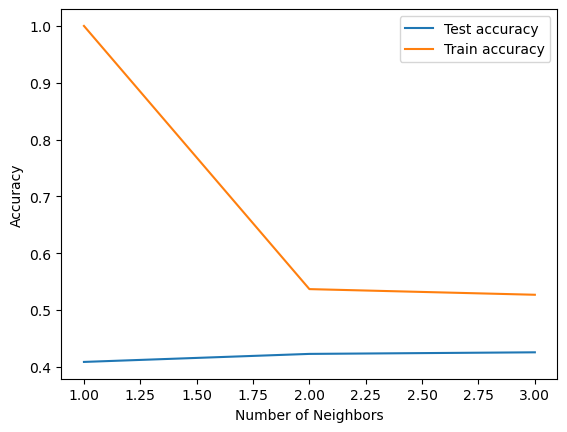

In [30]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

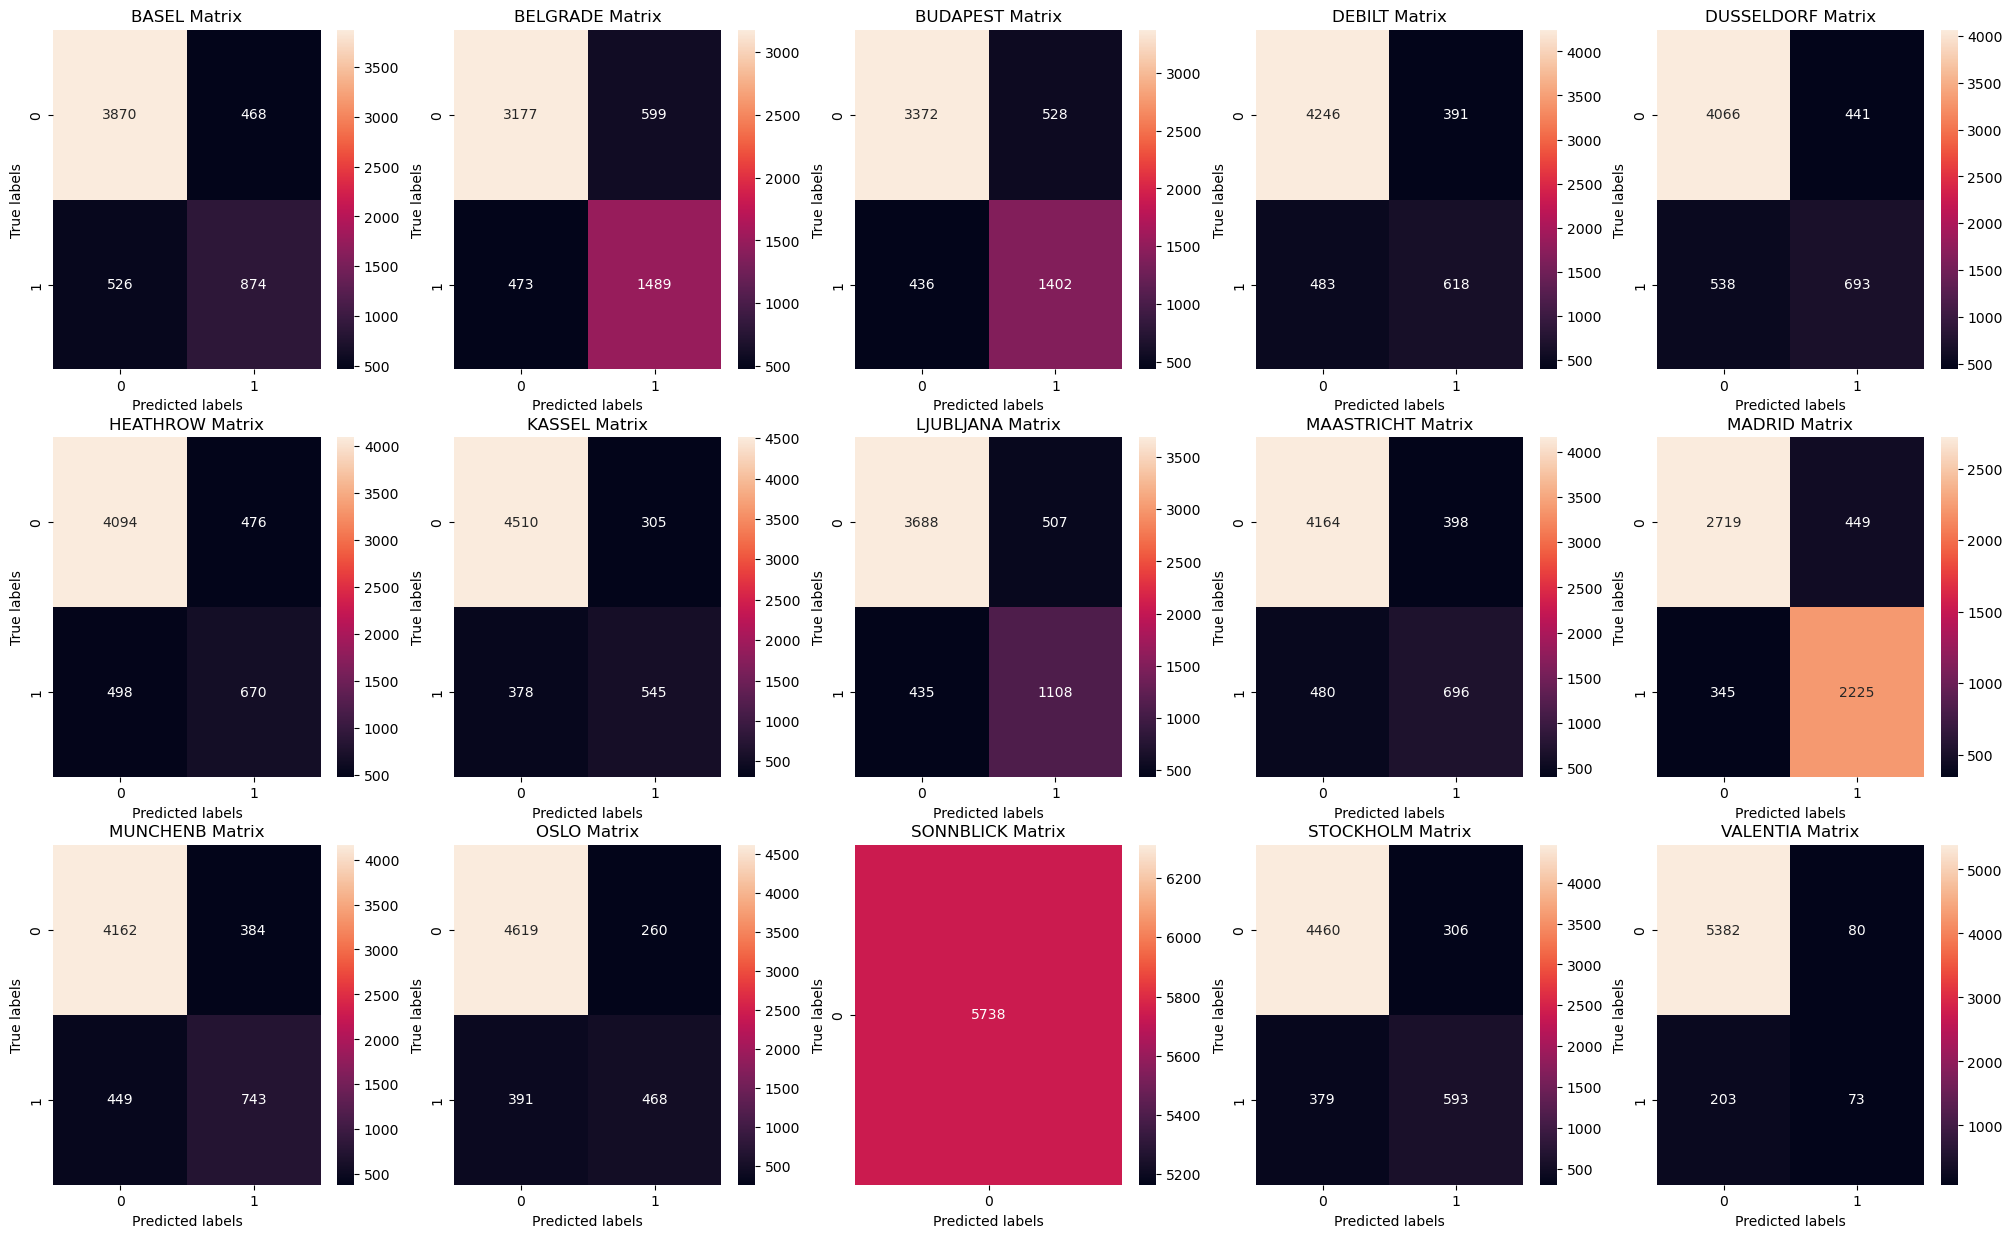

In [31]:
locations = list({x.split("_")[0] for x in df_scaled2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

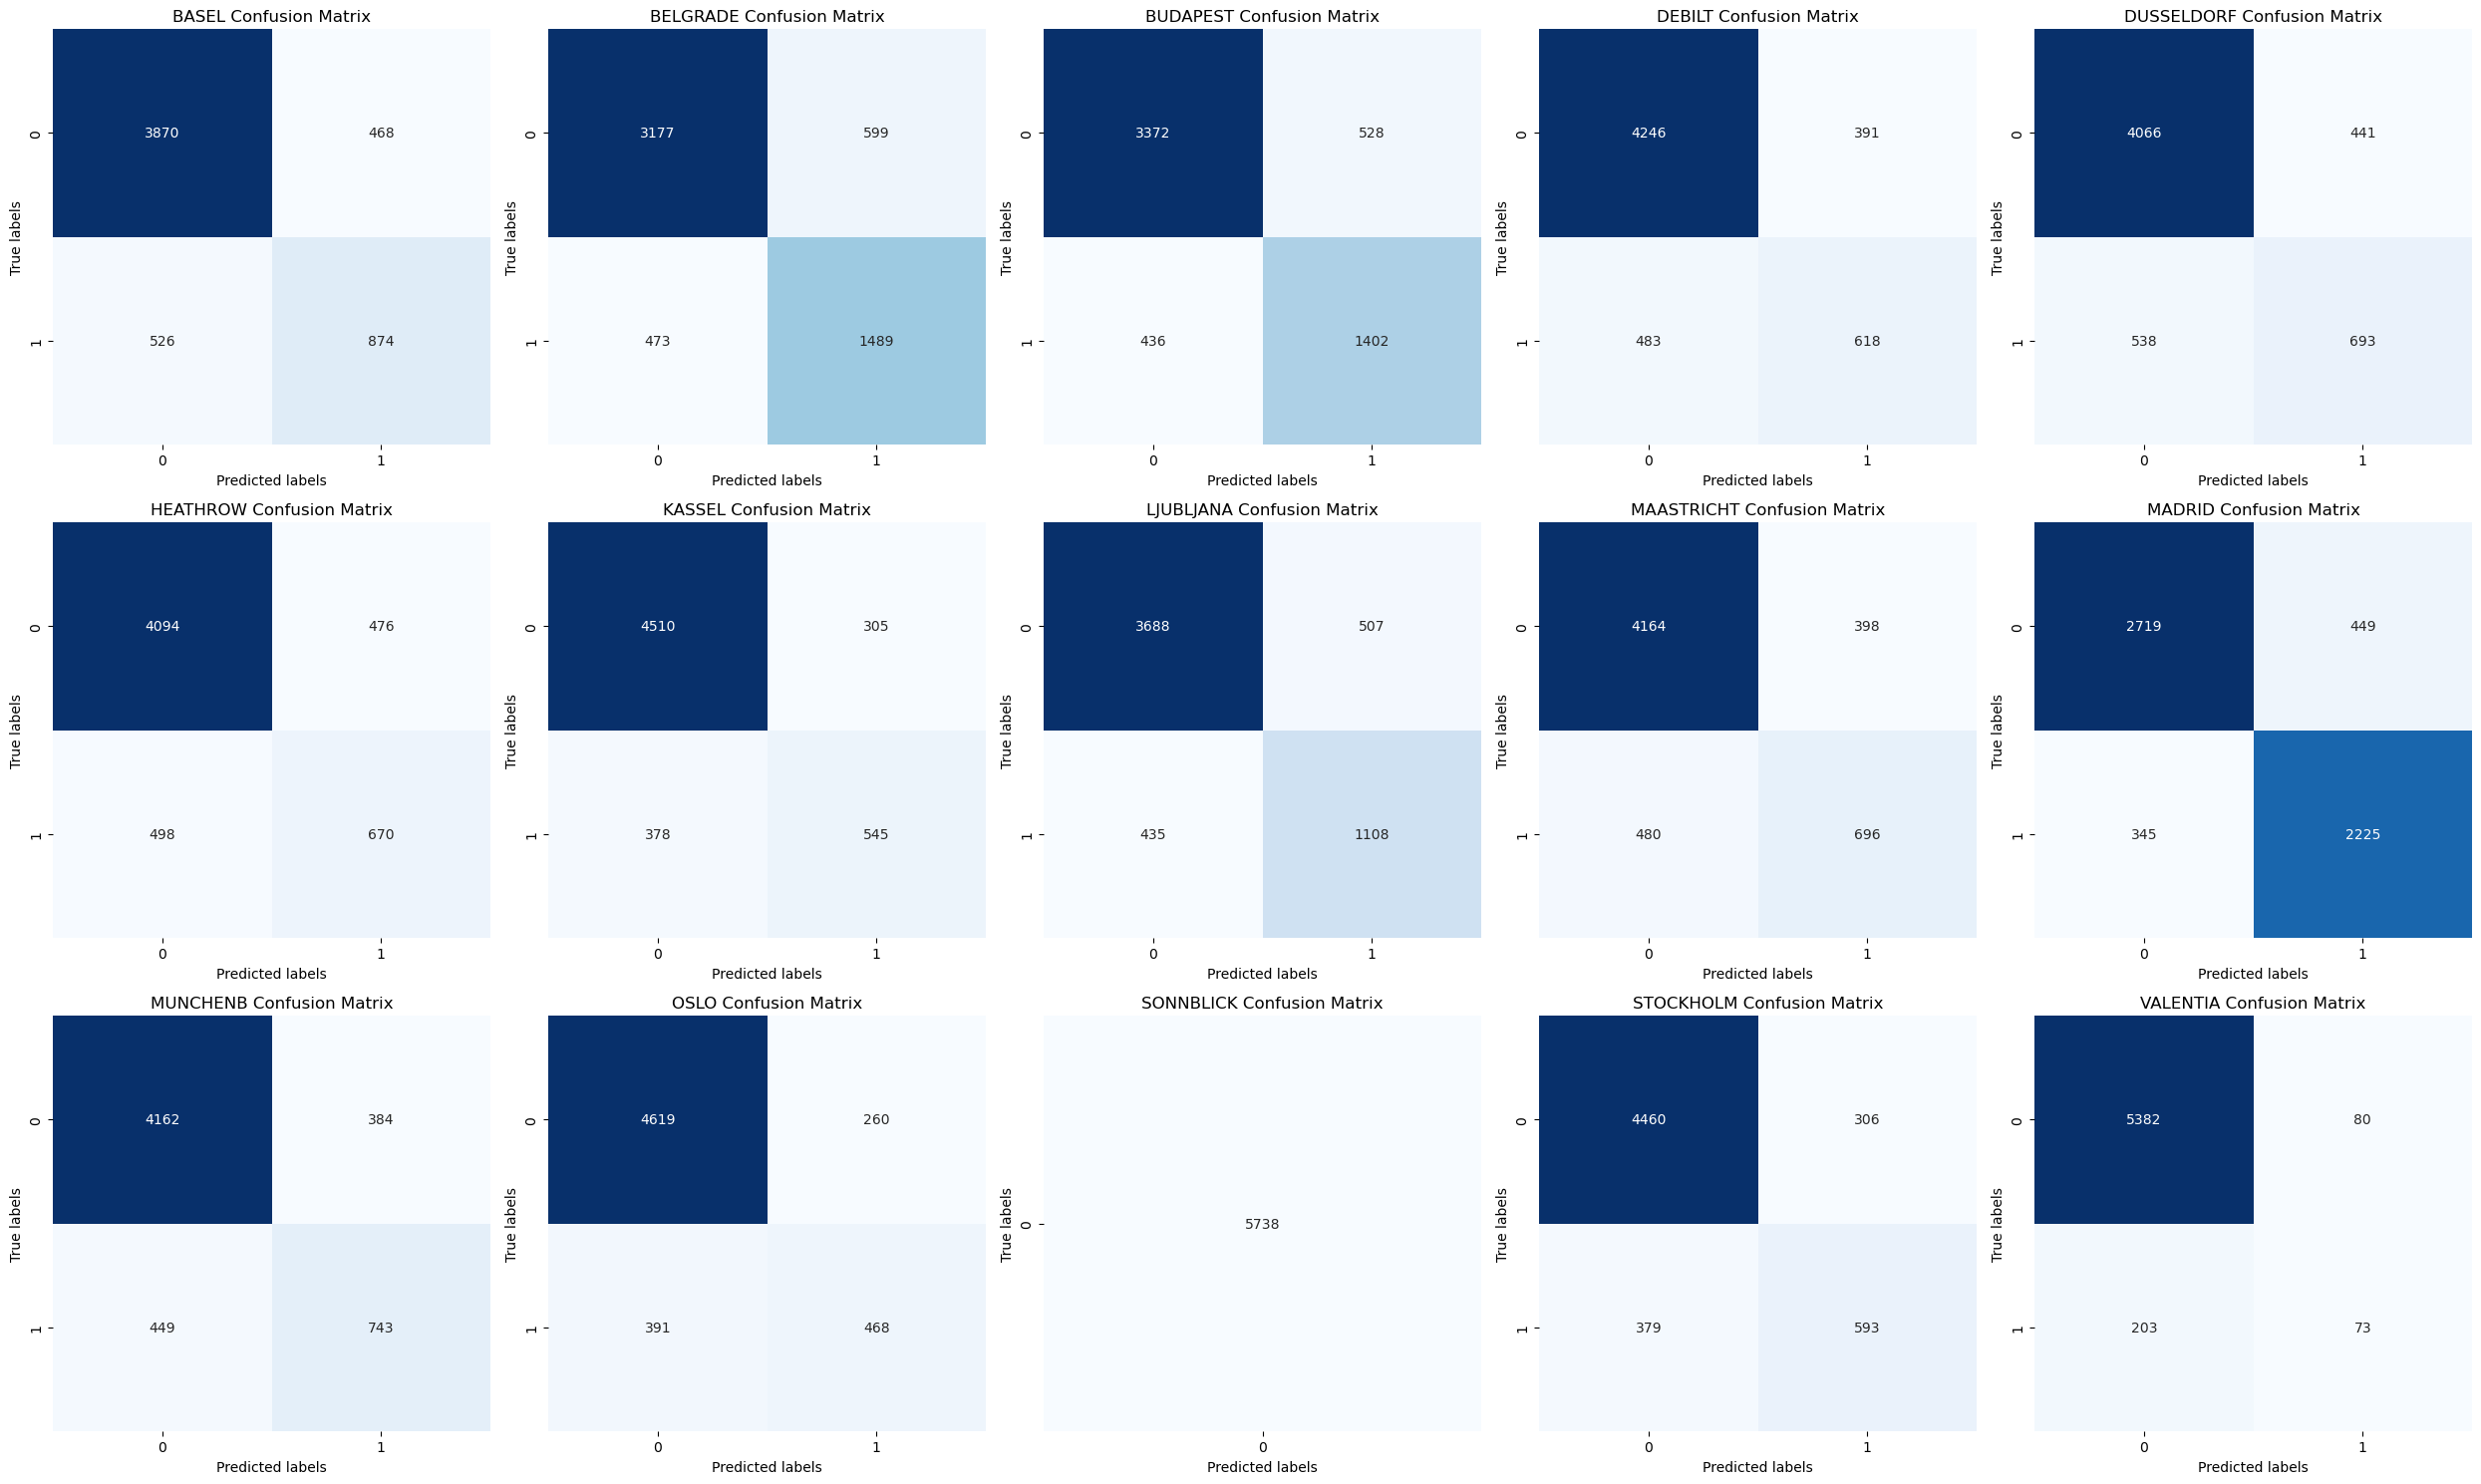

In [32]:
# [ChatGPT Version:](OpenAI. (2024). ChatGPT (4o) [Large language model]. https://chatgpt.com/c/a42b6d18-06fa-40a8-9873-bb59f6afa0cf)

# List of locations (weather stations)
locations = list({x.split("_")[0] for x in df_scaled2.columns})
locations.sort()

# Key to identify which column in y_test corresponds to pleasant weather
key = "_pleasant_weather"

# Create subplots to display multiple confusion matrices
fig, ax = plt.subplots(3, 5, figsize=(25, 15))  # Modify based on the number of locations
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  # Ensure we don't exceed the number of locations
            name = locations[count]
            # Calculate the confusion matrix for each station
            cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count])
            
            # Plot the confusion matrix
            sns.heatmap(cm, annot=True, fmt="g", ax=ax[i, j], cmap="Blues", cbar=False)
            
            # Set labels and title for each subplot
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(f'{name} Confusion Matrix')
            count += 1

plt.tight_layout()
plt.show()

# Calculate Accuracy for All Weather Stations

### 3.1 Accuracy for Each Weather Station

In [33]:
# [ChatGPT Version:](OpenAI. (2024). ChatGPT (4o) [Large language model]. https://chatgpt.com/c/a42b6d18-06fa-40a8-9873-bb59f6afa0cf)

# Loop through each weather station and calculate the accuracy for each one:

for count, location in enumerate(locations):
    accuracy = accuracy_score(y_test[location + '_pleasant_weather'], y_pred[:, count])
    print(f'Accuracy for {location}: {accuracy:.2f}')

Accuracy for BASEL: 0.83
Accuracy for BELGRADE: 0.81
Accuracy for BUDAPEST: 0.83
Accuracy for DEBILT: 0.85
Accuracy for DUSSELDORF: 0.83
Accuracy for HEATHROW: 0.83
Accuracy for KASSEL: 0.88
Accuracy for LJUBLJANA: 0.84
Accuracy for MAASTRICHT: 0.85
Accuracy for MADRID: 0.86
Accuracy for MUNCHENB: 0.85
Accuracy for OSLO: 0.89
Accuracy for SONNBLICK: 1.00
Accuracy for STOCKHOLM: 0.88
Accuracy for VALENTIA: 0.95


### 3.2 Overall Accuracy (for All Stations Combined)

In [34]:
# Flatten the arrays (in case they are multi-dimensional) and calculate overall accuracy
overall_accuracy = accuracy_score(y_test.values.ravel(), y_pred.ravel())

print(f'Overall Accuracy: {overall_accuracy:.2f}')

Overall Accuracy: 0.87


### 3.3 Compare Accuracy Across k-Values

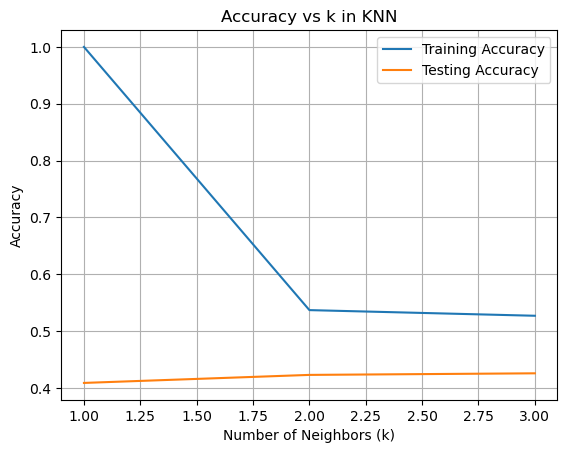

In [35]:
import matplotlib.pyplot as plt

# Assuming you already have train_acc and test_acc from running KNN on different k values
k_range = np.arange(1, 4)

# Plotting accuracy vs k
plt.plot(k_range, train_acc, label='Training Accuracy')
plt.plot(k_range, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in KNN')
plt.legend()
plt.grid(True)
plt.show()

## **Conclusion:**
#### Based on the outputs:

### **Accuracy:**
#### The overall accuracy of the model is 87%. This indicates that the model performs reasonably well in predicting pleasant weather across different stations.

#### **Overfitting:** 
#### There is overfitting when k=1, as the training accuracy is 100%, and the test accuracy is only 41%. Increasing k reduces the overfitting but does not drastically improve test accuracy.

#### **Stations and Accuracy:** 
#### Some stations like SONNBLICK, VALENTIA, and OSLO have very high accuracy, possibly due to cleaner or more predictable weather data. Meanwhile, stations like BELGRADE and BUDAPEST have lower accuracy, indicating more variability in their weather patterns, which makes predictions harder.

#### **Scaling Impact:** 
#### You ran the model on both the unscaled and scaled data, and since scaling typically impacts distance-based algorithms like KNN, checking if scaled data improves the results could be an important step.